In [1]:
import pandas as pd

import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(11,7)})
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/boolean-data-analytics/data/main/Superstore%20Data%20S.csv")
df.head()

,Order ID,Order Date,Country,Region,State,City,Category,Sub-Category,Product Name,Customer Name,Quantity,Sales,Discount,Profit
0,US-2019-103800,03/01/2019,United States,Central,Texas,Houston,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Darren Powers,2,16.448,0.2,5.5512
1,US-2019-112326,04/01/2019,United States,Central,Illinois,Naperville,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,Phillina Ober,2,3.540,0.8,-5.4870
2,US-2019-112326,04/01/2019,United States,Central,Illinois,Naperville,Office Supplies,Labels,Avery 508,Phillina Ober,3,11.784,0.2,4.2717
3,US-2019-112326,04/01/2019,United States,Central,Illinois,Naperville,Office Supplies,Storage,SAFCO Boltless Steel Shelving,Phillina Ober,3,272.736,0.2,-64.7748
4,US-2019-141817,05/01/2019,United States,East,Pennsylvania,Philadelphia,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Mick Brown,3,19.536,0.2,4.8840


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       10194 non-null  object 
 1   Order Date     10194 non-null  object 
 2   Country        10194 non-null  object 
 3   Region         10194 non-null  object 
 4   State          10194 non-null  object 
 5   City           10194 non-null  object 
 6   Category       10194 non-null  object 
 7   Sub-Category   10194 non-null  object 
 8   Product Name   10194 non-null  object 
 9   Customer Name  10194 non-null  object 
 10  Quantity       10194 non-null  int64  
 11  Sales          10194 non-null  float64
 12  Discount       10194 non-null  float64
 13  Profit         10194 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.1+ MB


## Data Analysis

In [4]:
df['Country'].unique()

array(['United States', 'Canada'], dtype=object)

In [5]:
us = df[df['Country']=='United States']
us.head()

,Order ID,Order Date,Country,Region,State,City,Category,Sub-Category,Product Name,Customer Name,Quantity,Sales,Discount,Profit
0,US-2019-103800,03/01/2019,United States,Central,Texas,Houston,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Darren Powers,2,16.448,0.2,5.5512
1,US-2019-112326,04/01/2019,United States,Central,Illinois,Naperville,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,Phillina Ober,2,3.540,0.8,-5.4870
2,US-2019-112326,04/01/2019,United States,Central,Illinois,Naperville,Office Supplies,Labels,Avery 508,Phillina Ober,3,11.784,0.2,4.2717
3,US-2019-112326,04/01/2019,United States,Central,Illinois,Naperville,Office Supplies,Storage,SAFCO Boltless Steel Shelving,Phillina Ober,3,272.736,0.2,-64.7748
4,US-2019-141817,05/01/2019,United States,East,Pennsylvania,Philadelphia,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Mick Brown,3,19.536,0.2,4.8840


In [6]:
us['Country'].unique()

array(['United States'], dtype=object)

In [7]:
us.head(3)

,Order ID,Order Date,Country,Region,State,City,Category,Sub-Category,Product Name,Customer Name,Quantity,Sales,Discount,Profit
0,US-2019-103800,03/01/2019,United States,Central,Texas,Houston,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Darren Powers,2,16.448,0.2,5.5512
1,US-2019-112326,04/01/2019,United States,Central,Illinois,Naperville,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,Phillina Ober,2,3.540,0.8,-5.4870
2,US-2019-112326,04/01/2019,United States,Central,Illinois,Naperville,Office Supplies,Labels,Avery 508,Phillina Ober,3,11.784,0.2,4.2717


In [8]:
us['Profit'].mean()

28.65689630778467

In [9]:
us.groupby('Category', as_index=False)['Profit'].sum()

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


In [10]:
us_cat_profit = us.groupby('Category', as_index=False)['Profit'].sum().sort_values('Profit', ascending = False)
us_cat_profit

,Category,Profit
2,Technology,145454.9481
1,Office Supplies,122490.8008
0,Furniture,18451.2728


### Profit by Category

<Axes: title={'center': 'Profit by Category'}, xlabel='Category', ylabel='Profit'>

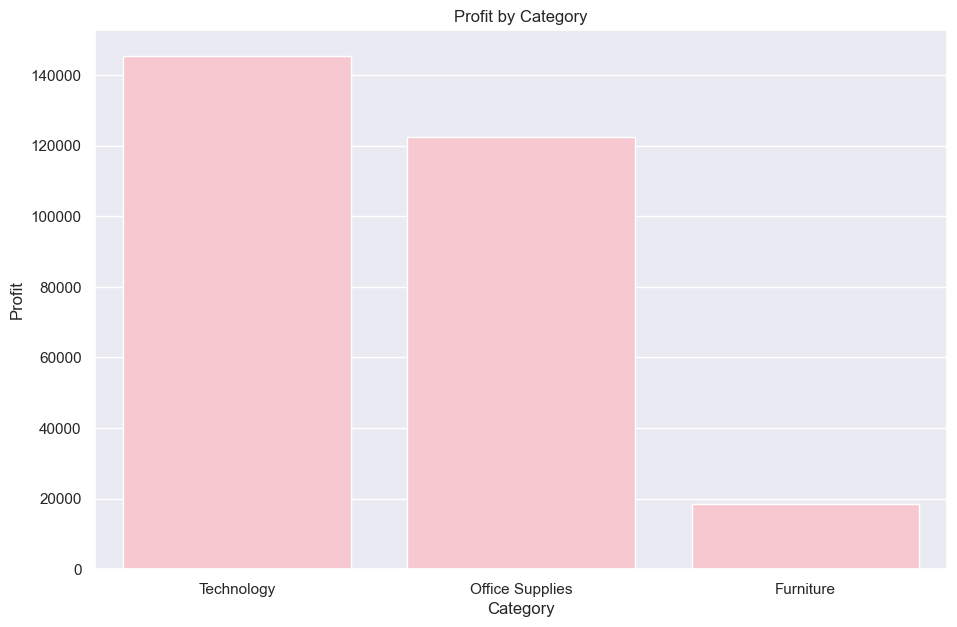

In [11]:
plt.title('Profit by Category')
sns.barplot(x = 'Category', y = 'Profit', data=us_cat_profit, color='pink')

In [13]:
us_region_profit = us.groupby('Region', as_index = False)['Profit'].sum()
us_region_profit

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


### Regional Distribution

<Axes: xlabel='Region', ylabel='Profit'>

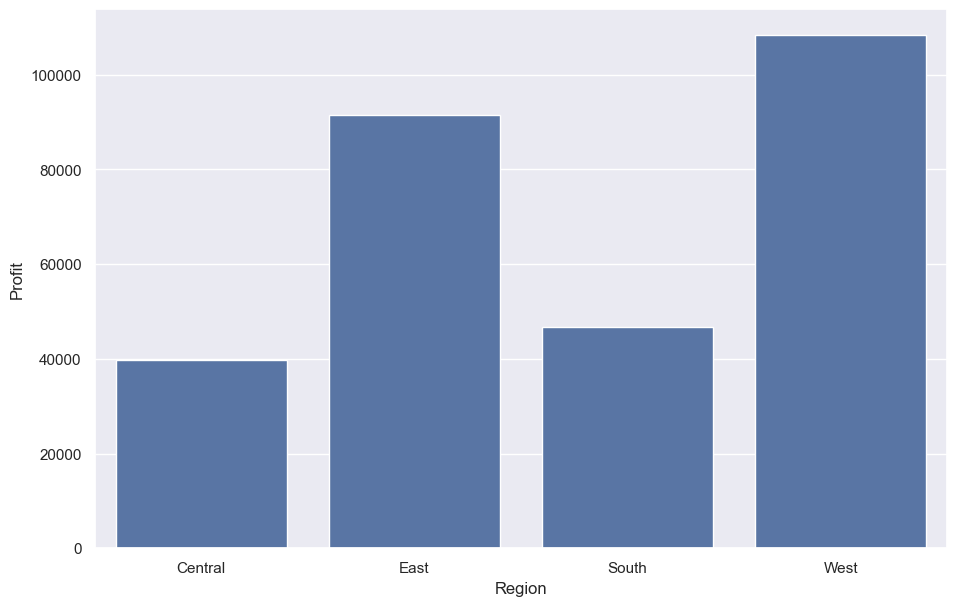

In [15]:
us_region_profit = us.groupby('Region', as_index=False)['Profit'].sum()

sns.color_palette('rocket')

sns.barplot(data = us_region_profit, x='Region', y='Profit')

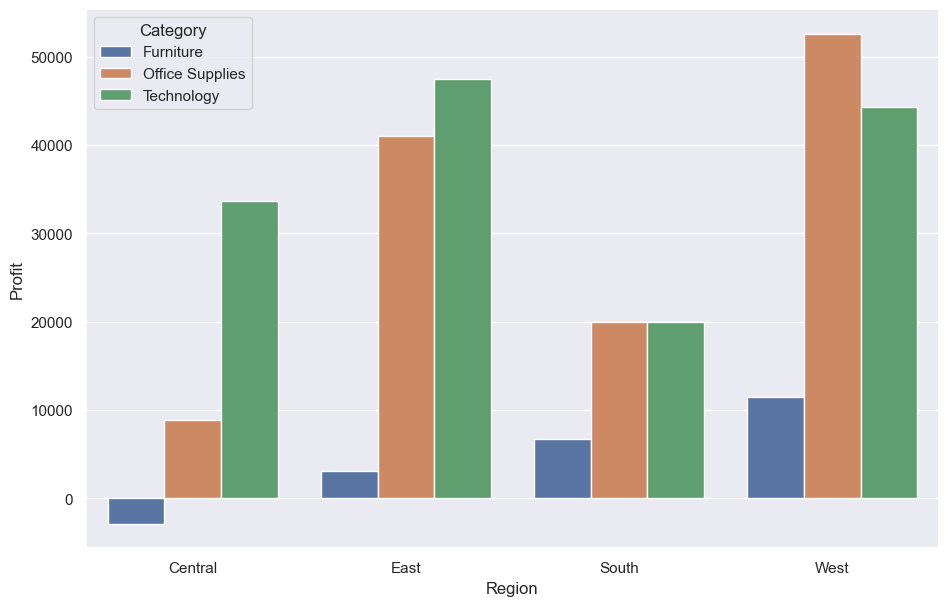

In [16]:
us_cat_region_profit = us.groupby(['Category', 'Region'], as_index=False)['Profit'].sum()
sns.barplot(x='Region', y='Profit', hue='Category', data=us_cat_region_profit)
plt.show()

In [17]:
pd.pivot_table(data = us_cat_region_profit,
               values = 'Profit',
               index = 'Category',
               columns = 'Region',
               aggfunc = 'sum')

Region,Central,East,South,West
Category,,,,
Furniture,-2871.0494,3046.1658,6771.2061,11504.9503
Office Supplies,8879.9799,41014.5791,19986.3928,52609.8490
Technology,33697.4320,47462.0351,19991.8314,44303.6496


In [19]:
us_cntr_furn = us[(us['Category']=='Furniture') & (us['Region']=='Central')]

us_cntr_furn.head()

,Order ID,Order Date,Country,Region,State,City,Category,Sub-Category,Product Name,Customer Name,Quantity,Sales,Discount,Profit
14,US-2019-105417,07/01/2019,United States,Central,Texas,Huntsville,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",Vivek Sundaresam,3,76.728,0.6,-53.7096
44,US-2019-167927,20/01/2019,United States,Central,Michigan,Westland,Furniture,Furnishings,Ultra Door Push Plate,Xylona Preis,3,14.730,0.0,4.8609
45,US-2019-167927,20/01/2019,United States,Central,Michigan,Westland,Furniture,Furnishings,Eldon ClusterMat Chair Mat with Cordless Antis...,Xylona Preis,3,272.940,0.0,30.0234
68,US-2019-167997,26/01/2019,United States,Central,South Dakota,Rapid City,Furniture,Bookcases,"Safco Value Mate Series Steel Bookcases, Baked...",Carol Adams,2,141.960,0.0,39.7488
100,US-2019-168368,11/02/2019,United States,Central,Missouri,Columbia,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",Guy Armstrong,1,60.890,0.0,15.2225


In [20]:
us_cntr_furn.shape

(481, 14)

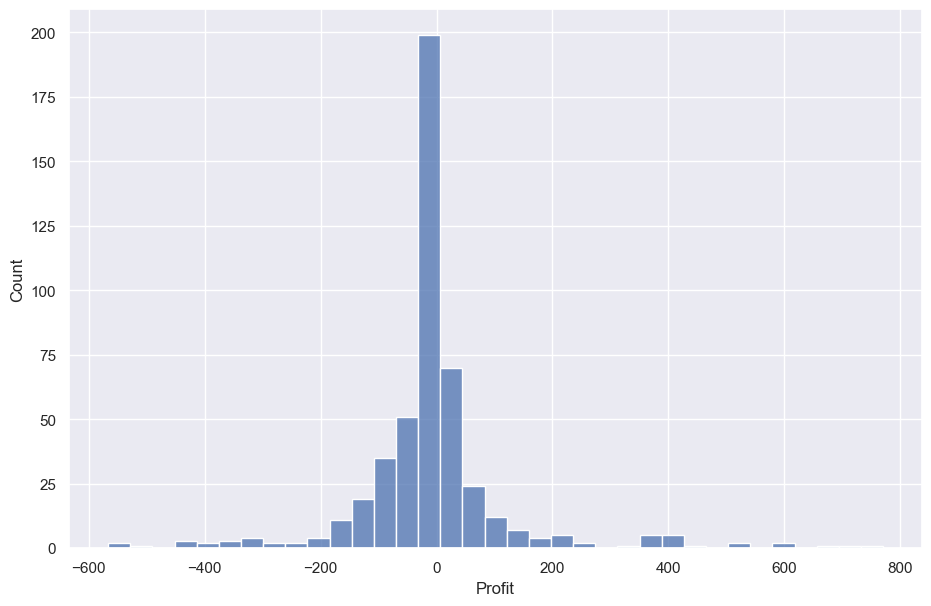

In [21]:
sns.histplot(data=us_cntr_furn, x='Profit', bins=35, kde=False)
plt.show()

In [22]:
us_cntr_furn['Profit'].sum()

-2871.0494

In [23]:
us_cntr_furn.groupby(['Sub-Category'], as_index=False)['Profit'].sum()

,Sub-Category,Profit
0,Bookcases,-1997.9043
1,Chairs,6592.7221
2,Furnishings,-3906.2168
3,Tables,-3559.6504


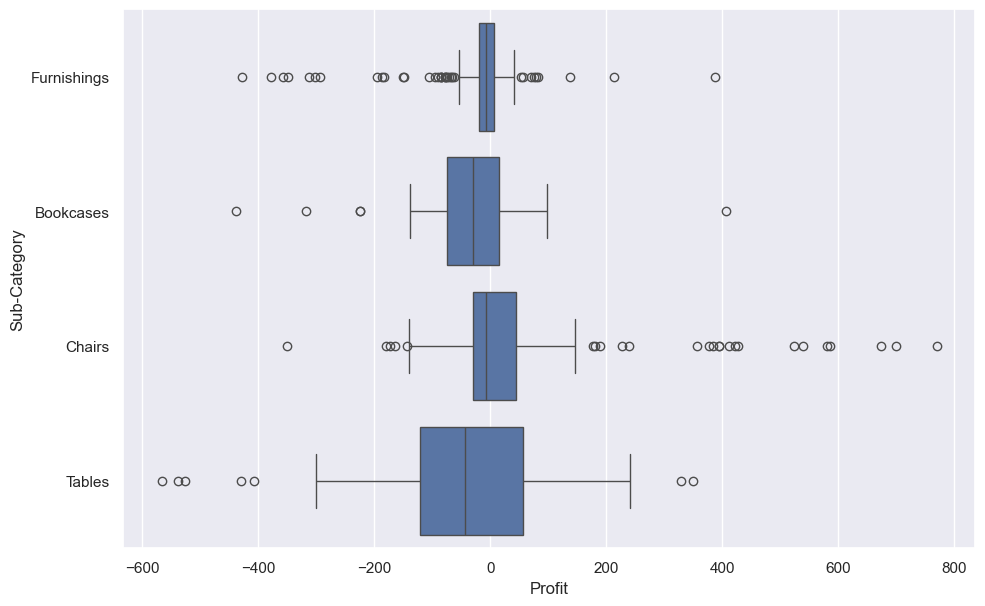

In [24]:
sns.boxplot(data=us_cntr_furn, x='Profit', y = 'Sub-Category')
plt.show()

In [25]:
us_cntr_furn.groupby(['Sub-Category'], as_index=False)['Discount'].mean()

,Sub-Category,Discount
0,Bookcases,0.232800
1,Chairs,0.192857
2,Furnishings,0.403902
3,Tables,0.262500


In [26]:
us_profit_dscnt = us_cntr_furn.groupby(['Sub-Category'], as_index=False).agg(
    profit_sum = ('Profit', 'sum'),
    discount_avg = ('Discount', 'mean')
)
us_profit_dscnt

,Sub-Category,profit_sum,discount_avg
0,Bookcases,-1997.9043,0.232800
1,Chairs,6592.7221,0.192857
2,Furnishings,-3906.2168,0.403902
3,Tables,-3559.6504,0.262500


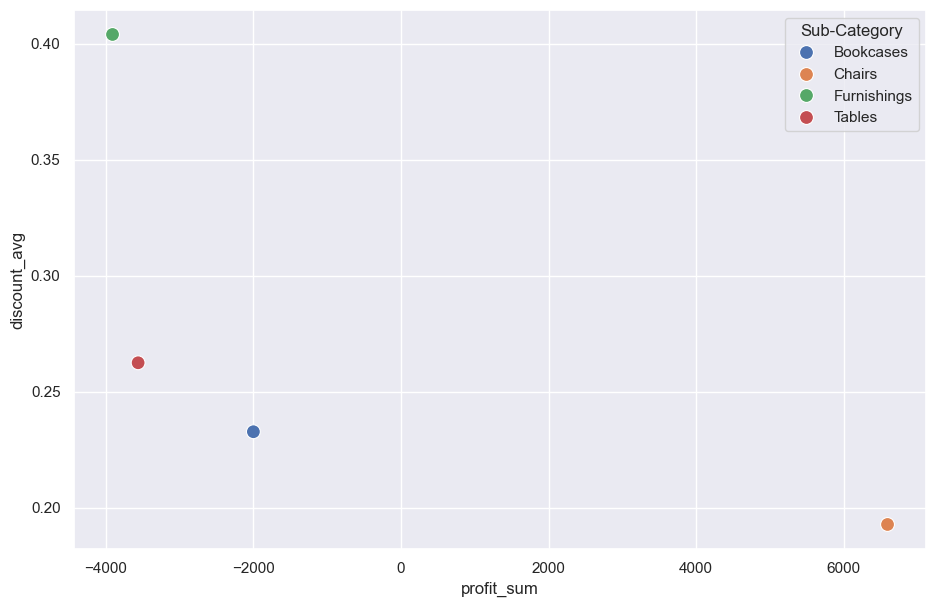

In [27]:
sns.scatterplot(data=us_profit_dscnt, x='profit_sum', y='discount_avg', hue='Sub-Category', s = 100)
plt.show()

### Discount & Profit 

In [28]:
us_furn_discount = us_cntr_furn.groupby('Discount', as_index = False)['Profit'].sum()
us_furn_discount

,Discount,Profit
0,0.00,16641.3819
1,0.30,-6866.8937
2,0.32,-2391.1377
3,0.50,-4309.7447
4,0.60,-5944.6552


In [29]:
us_furn_discount['cumsum'] = us_furn_discount['Profit'].cumsum()
us_furn_discount

,Discount,Profit,cumsum
0,0.00,16641.3819,16641.3819
1,0.30,-6866.8937,9774.4882
2,0.32,-2391.1377,7383.3505
3,0.50,-4309.7447,3073.6058
4,0.60,-5944.6552,-2871.0494


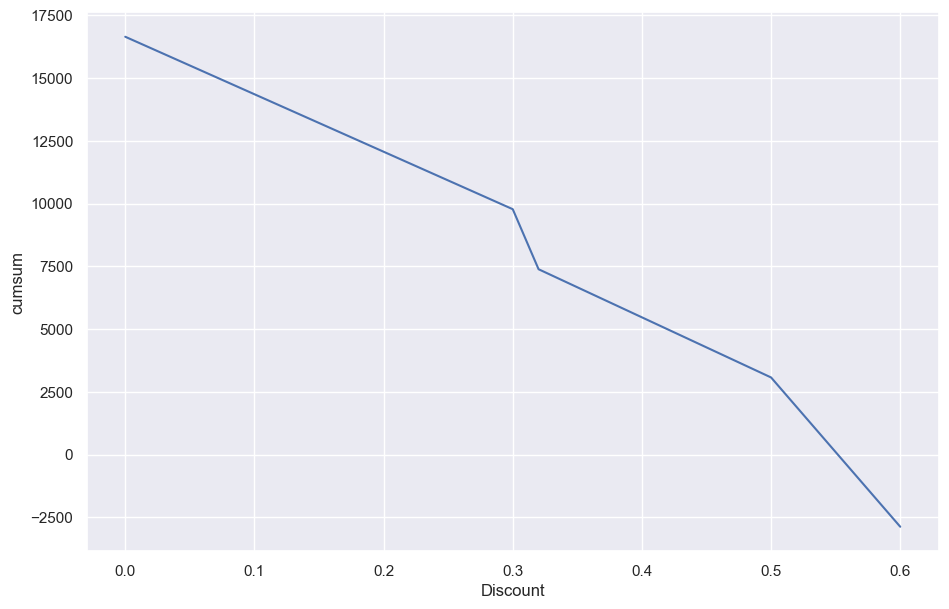

In [30]:
sns.lineplot(x = 'Discount', y = 'cumsum', data = us_furn_discount)
plt.show()

In [31]:
us_discount = us.groupby(['Sub-Category', 'Discount'], as_index = False)['Profit'].sum()
us_discount.head(3)

,Sub-Category,Discount,Profit
0,Accessories,0.0,35289.2539
1,Accessories,0.2,6647.3818
2,Appliances,0.0,23183.7361


In [32]:
us_discount['Cumulative Sum of Profit'] = us_discount.groupby('Sub-Category', as_index = False)['Profit'].cumsum()
us_discount.head()

,Sub-Category,Discount,Profit,Cumulative Sum of Profit
0,Accessories,0.0,35289.2539,35289.2539
1,Accessories,0.2,6647.3818,41936.6357
2,Appliances,0.0,23183.7361,23183.7361
3,Appliances,0.1,1086.0808,24269.8169
4,Appliances,0.2,2497.8297,26767.6466


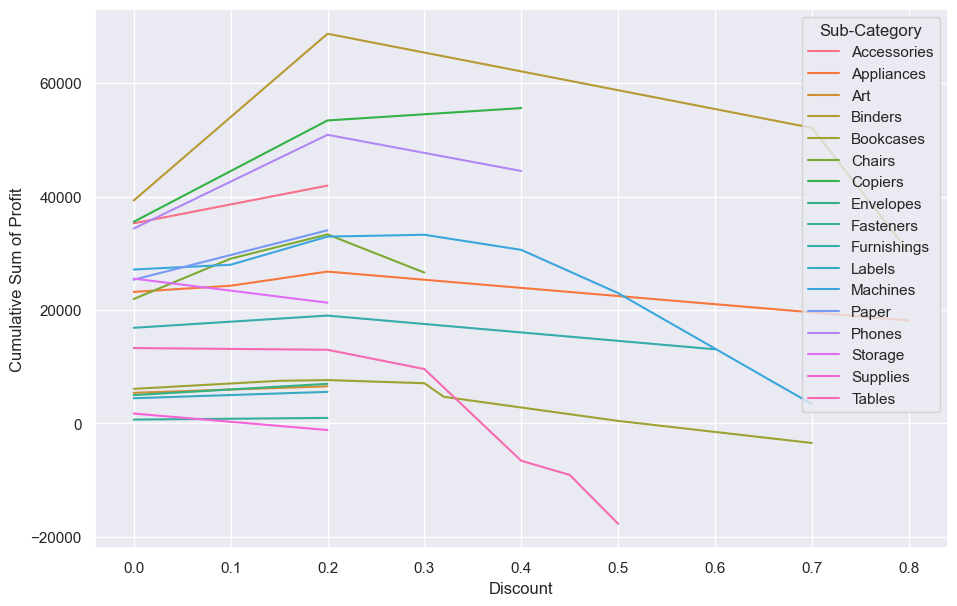

In [33]:
sns.lineplot(x = 'Discount', y = 'Cumulative Sum of Profit', hue = 'Sub-Category', data = us_discount)
plt.show()